<a href="https://colab.research.google.com/github/SHUBHR1005/MAIN-PROJECTS/blob/main/STOCK_MARKET_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Arial" size="6" color="#006064"><b> $\bullet$ TIME SERIES ANALYSIS OF APPLE INC. STOCK MARKET DATA: A COMPREHENSIVE STUDY</b></font>

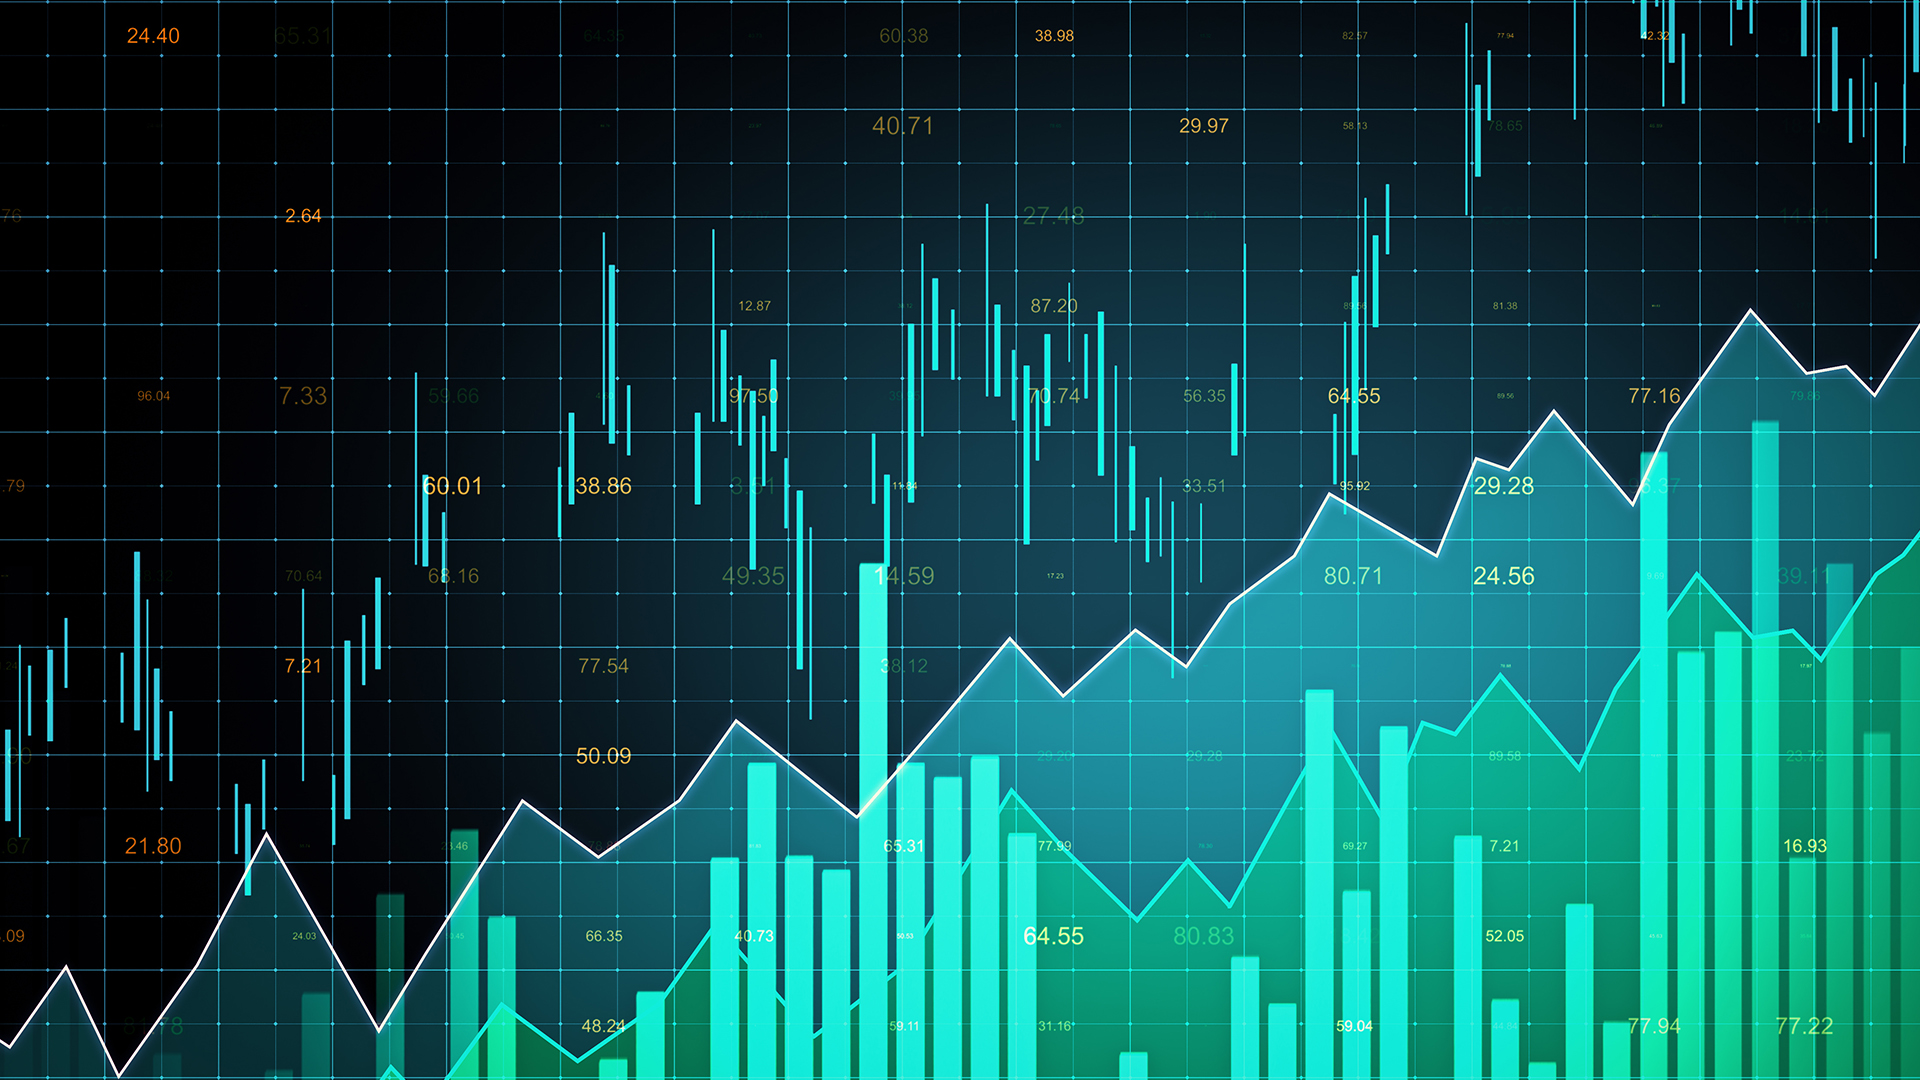

## <font face="Arial" size="5" color="#006064"><b> LIBRARIES </b></font>

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from scipy import stats
import matplotlib.dates as mdates
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.dates as mdates
from plotly.offline import init_notebook_mode, plot, iplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import warnings
from pmdarima.arima import auto_arima
import pmdarima as pm
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import ttest_1samp
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
warnings.filterwarnings("ignore")
%matplotlib inline

## <font face="Arial" size="5" color="#006064"><b> DATA </b></font>

---



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASET/AAPL_data.csv")
df=df.rename(columns=str.upper)
df['NAME'] = df['NAME'].replace('AAPL', 'APPLE INC')

In [ ]:
df.tail(10).style.set_properties(**{'width': '300px',
                                    'color': 'black',
                                    'border': '2px  white'}).background_gradient(cmap="GnBu")

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,NAME
1249,2018-01-25,174.505000,174.950000,170.530000,171.110000,41529004,APPLE INC
1250,2018-01-26,172.000000,172.000000,170.060000,171.510000,39143011,APPLE INC
1251,2018-01-29,170.160000,170.160000,167.070000,167.960000,50640406,APPLE INC
1252,2018-01-30,165.525000,167.370000,164.700000,166.970000,46048185,APPLE INC
1253,2018-01-31,166.870000,168.441700,166.500000,167.430000,32478930,APPLE INC
1254,2018-02-01,167.165000,168.620000,166.760000,167.780000,47230787,APPLE INC
1255,2018-02-02,166.000000,166.800000,160.100000,160.500000,86593825,APPLE INC
1256,2018-02-05,159.100000,163.880000,156.000000,156.490000,72738522,APPLE INC
1257,2018-02-06,154.830000,163.720000,154.000000,163.030000,68243838,APPLE INC
1258,2018-02-07,163.085000,163.400000,159.068500,159.540000,51608580,APPLE INC


In [ ]:
#Get the information for the DataFrame
column_names = df.columns
non_null_counts = df.count()
data_types = df.dtypes

# Create a DataFrame to hold the information
info_df = pd.DataFrame({
    'Column Name': column_names,
    'Non-Null Count': non_null_counts,
    'Data Type': data_types
})

# Display the information DataFrame
info_df.style.set_properties(**{'width': '100px',
                                    'color': 'white',
                                    'border': '2px ',
                                'background-color': 'navy'})

,Column Name,Non-Null Count,Data Type
DATE,DATE,1259,object
OPEN,OPEN,1259,float64
HIGH,HIGH,1259,float64
LOW,LOW,1259,float64
CLOSE,CLOSE,1259,float64
VOLUME,VOLUME,1259,int64
NAME,NAME,1259,object


## <font face="Arial" size="5" color="#006064"><b> DATA CLEANING </b></font>

---


###  PERCENTAGE OF MISSING VALUES IN EACH VARIABLE

In [ ]:
# Step 1: Total number of missing values in each column
missing_values_count = df.isnull().sum()

# Step 2: Total number of rows in the DataFrame
total_rows = df.shape[0]

# Step 3: Percentage of missing values for each column
percentage_missing_values = (missing_values_count / total_rows) * 100

# Step 4: New DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Variables': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage Missing': percentage_missing_values.values
})

# Step 5: Sort the DataFrame by percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Percentage Missing')

# Step 6: DataFrame with missing value information
missing_values_df.style.set_properties(**{'width': '100px',
                                    'color': 'white',
                                    'border': '2px ',
                                'background-color': 'navy'})

,Variables,Missing Values,Percentage Missing
0,DATE,0,0.000000
1,OPEN,0,0.000000
2,HIGH,0,0.000000
3,LOW,0,0.000000
4,CLOSE,0,0.000000
5,VOLUME,0,0.000000
6,NAME,0,0.000000


###  CHANGING DATE TO DATE TYPE VARIABLE

In [ ]:
# change the dtype of date column
new_df = df.copy()
new_df.loc[:, 'DATE'] = pd.to_datetime(df.loc[:, 'DATE'], format='%Y/%m/%d')


## <font face="Arial" size="5" color="#006064"><b> EXPLORATORY DATA ANALYSIS
 </b></font>

---


### <font face="Arial" size="4" color="#006064"><b> OPEN-HIGH-LOW-CLOSE CHART


---

An open-high-low-close chart (also OHLC) is a type of chart typically used to illustrate movements in the price of a financial instrument over time. Each vertical line on the chart shows the price range (the highest and lowest prices) over one unit of time, e.g., one day or one hour. Tick marks project from each side of the line indicating the opening price (e.g., for a daily bar chart this would be the starting price for that day) on the left, and the closing price for that time period on the right. The bars may be shown in different hues depending on whether prices rose or fell in that period.

In [ ]:
import plotly.graph_objects as go

# Assuming you have new_df DataFrame and data ready

fig = go.Figure(data=[go.Candlestick(x=new_df['DATE'],
                open=new_df['OPEN'], high=new_df['HIGH'],
                low=new_df['LOW'], close=new_df['CLOSE'])
                     ])

# Create a rangeselector button to allow zooming into specific date ranges
fig.update_xaxes(
    rangeslider=dict(visible=False),  # Disable the default rangeslider
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    type="date"
)

fig.update_layout(
    title='OHLC CHART',
    title_font=dict(size=24, color='white'),  # Set font size and color of the title
    xaxis_rangeslider_visible=False,
    height=800,  # Set the height of the plot
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black'  # Set paper background color to black
)

# Update xaxis and yaxis properties
fig.update_xaxes(
    showgrid=True,  # Show the grid lines
    gridcolor='lightgrey',  # Set grid line color to light grey
    gridwidth=1,  # Set grid line width
    griddash='dot',  # Set grid line style to dotted
    tickfont=dict(color='white'),  # Set x-tick color to white
    showline=True  # Show x-axis line
)
fig.update_yaxes(
    showgrid=True,  # Show the grid lines
    gridcolor='lightgrey',  # Set grid line color to light grey
    gridwidth=1,  # Set grid line width
    griddash='dot',  # Set grid line style to dotted
    tickfont=dict(color='white'),  # Set y-tick color to white
    showline=True  # Show y-axis line
)

fig.show()


### <font face="Arial" size="4" color="#006064"><b> LINE PLOT


---

In [ ]:
new_df.set_index('DATE', inplace=True)

OPEN-CLOSE LINE DIAGRAM

---



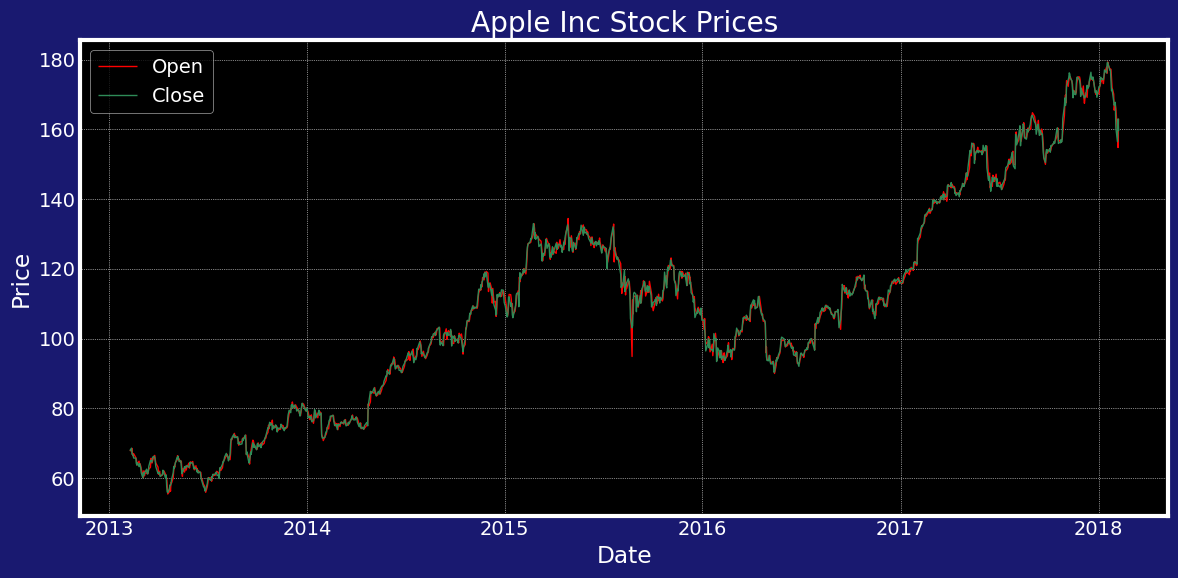

In [ ]:
# Set the style to dark background
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(12, 6), facecolor='midnightblue')
plt.plot(new_df.index, df['OPEN'], label='Open', color='red',linewidth=1)
plt.plot(new_df.index, df['CLOSE'], label='Close', color='seagreen',linewidth=1)

# Customize the chart
plt.title('Apple Inc Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the chart
plt.grid(linestyle='dotted', linewidth=0.5, color='white')
plt.tight_layout()
plt.show()

HIGH-LOW LINE DIAGRAM

---



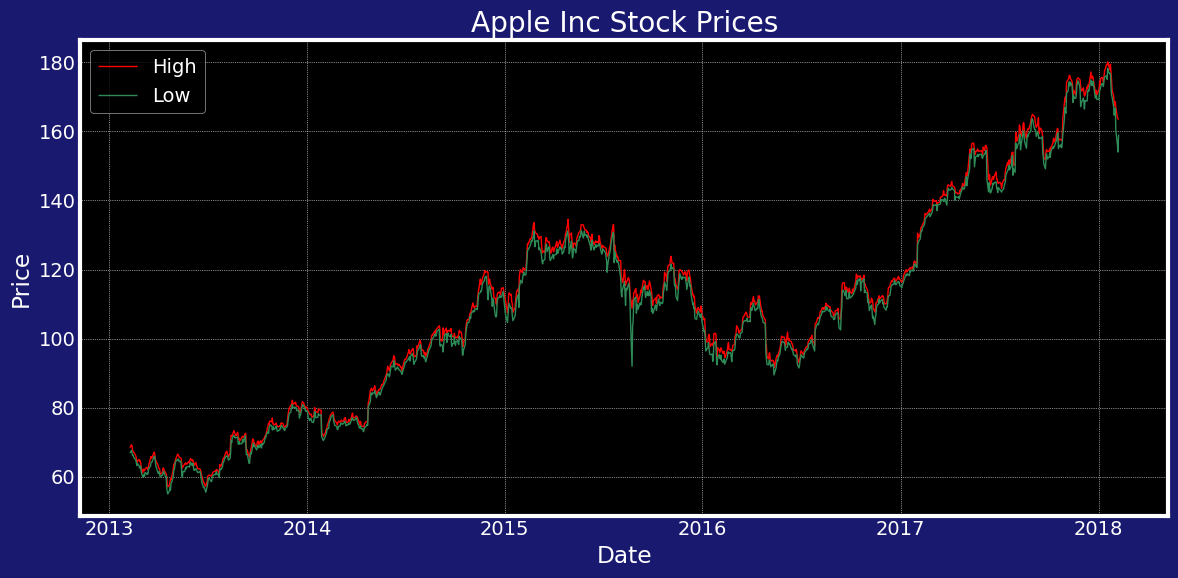

In [ ]:
# Set the style to dark background
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(12, 6), facecolor='midnightblue')
plt.plot(new_df.index, df['HIGH'], label='High', color='red',linewidth=1)
plt.plot(new_df.index, df['LOW'], label='Low', color='seagreen',linewidth=1)

# Customize the chart
plt.title('Apple Inc Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the chart
plt.grid(linestyle='dotted', linewidth=0.5, color='white')
plt.tight_layout()
plt.show()

VOLUME TRADED

---



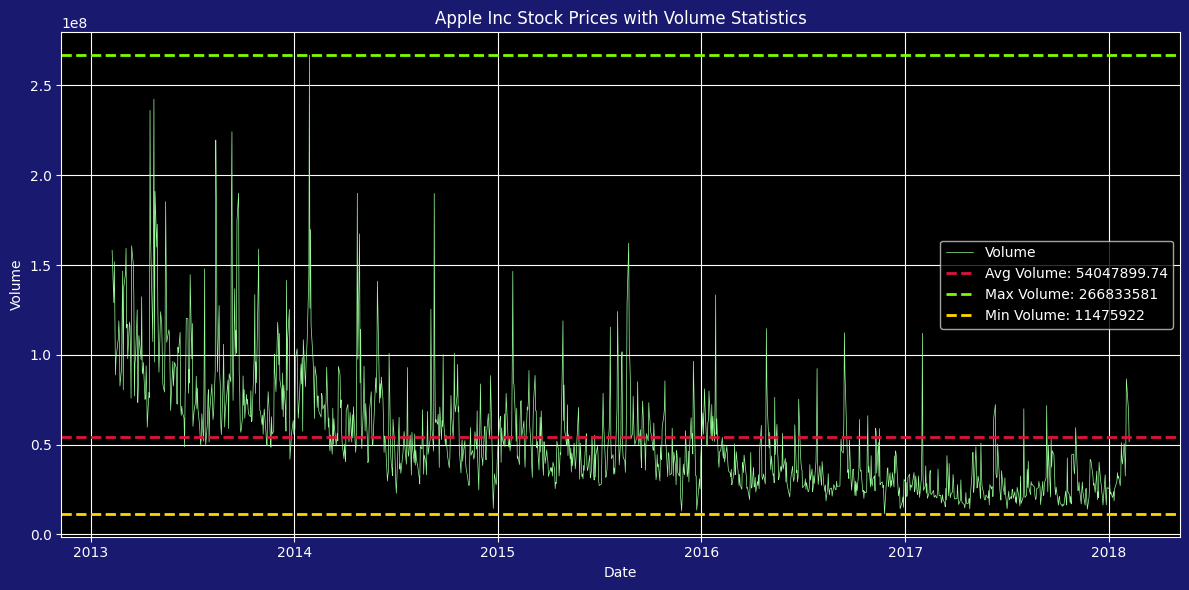

In [ ]:
# Calculate average, maximum, and minimum volume values
avg_volume = new_df['VOLUME'].mean()
max_volume = new_df['VOLUME'].max()
min_volume = new_df['VOLUME'].min()

# Set the style to dark background
plt.style.use('dark_background')

# Create the plot
plt.figure(figsize=(12, 6), facecolor='midnightblue')
plt.plot(new_df.index, new_df['VOLUME'], label='Volume', color='palegreen', linewidth=0.5)

# Plot average, maximum, and minimum volume as dotted lines
plt.axhline(y=avg_volume, color='crimson', linestyle='--', label=f'Avg Volume: {avg_volume:.2f}',linewidth=2)
plt.axhline(y=max_volume, color='lawngreen', linestyle='--', label=f'Max Volume: {max_volume}',linewidth=2)
plt.axhline(y=min_volume, color='gold', linestyle='--', label=f'Min Volume: {min_volume}',linewidth=2)


# Customize the chart
plt.title('Apple Inc Stock Prices with Volume Statistics')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Show the chart
plt.grid(linestyle='dotted', linewidth=0.5, color='white')
plt.tight_layout()
plt.show()


### <font face="Arial" size="4" color="#006064"><b> GROWTH OF STOCK PRICE


---

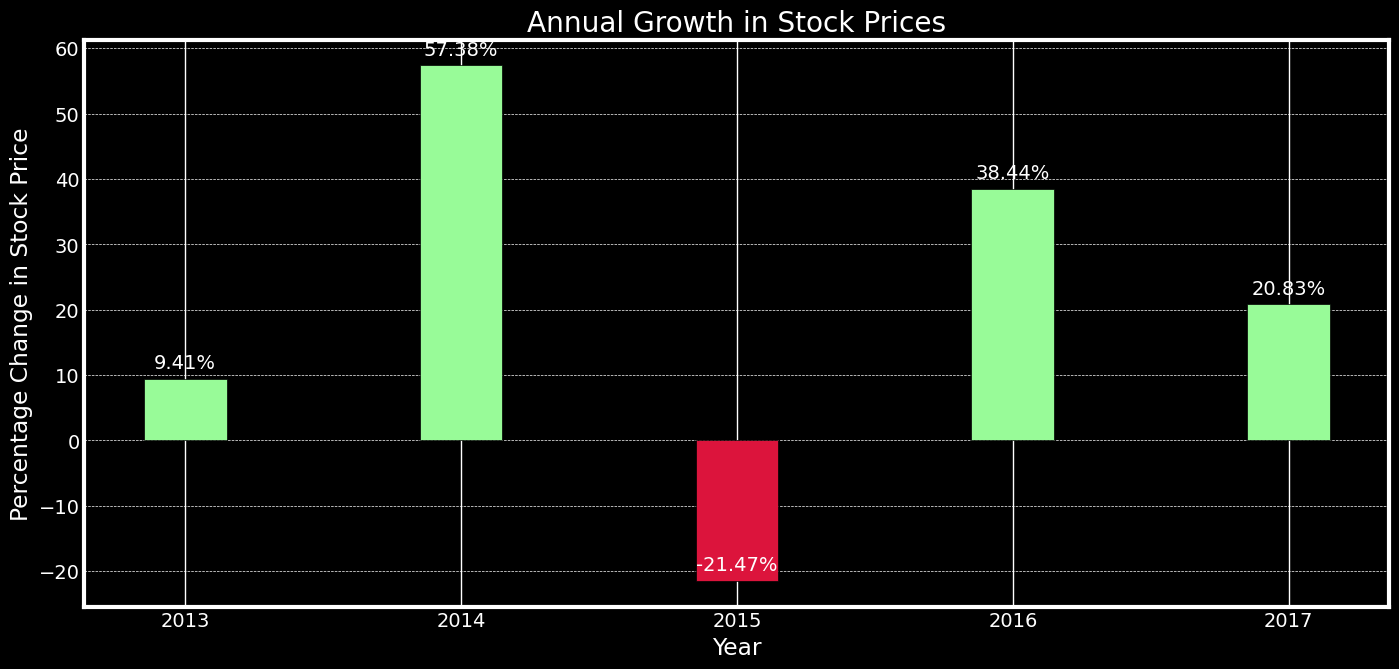

In [ ]:
# Extract unique years from the 'DATE' column
years = new_df.index.year.unique()

# Initialize a list to store percentage changes and corresponding years
percentage_changes = []
years_with_data = []

# Iterate through each year and calculate the percentage change in stock prices
for year in years:
    start_date = f'{year}-02-08'
    end_date = f'{year + 1}-02-07'  # End date is one year later
    filtered_df = new_df[start_date:end_date]
    if not filtered_df.empty:
        percentage_change = (filtered_df['CLOSE'].iloc[-1] - filtered_df['CLOSE'].iloc[0]) / filtered_df['CLOSE'].iloc[0] * 100
        percentage_changes.append(percentage_change)
        years_with_data.append(year)


plt.figure(figsize=(15, 7))

# Determine bar colors based on positive and negative percentage changes
colors = ['palegreen' if percentage > 0 else 'crimson' for percentage in percentage_changes]
bars = plt.bar(years_with_data, percentage_changes, color=colors, width=0.3, edgecolor='black', linewidth=0.5)

# Customize grid lines to be dotted
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Annotate the percentages above the bars
for bar, percentage in zip(bars, percentage_changes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%',
             ha='center', va='bottom', color='white')

plt.xlabel('Year')
plt.ylabel('Percentage Change in Stock Price')
plt.title('Annual Growth in Stock Prices')
plt.xticks(years_with_data)  # Set x-tick labels as years with available data
plt.show()


### <font face="Arial" size="4" color="#006064"><b> DAILY RETURN OF STOCK PRICES ANALYSIS


---

**Daily return hypothesis test**

In stock market, you will often hear that daily return of any stock price is 0% which means you will get zero return on your investment in one day.

So let's prove the hypothesis by analysing Apple Inc stocks and assesing it's daily return distribution.

* **H0: Daily return is zero**

* **Ha: Daily return is not zero**

We will prove this hypothesis as a one sample t-test as we know population mean but are not aware of std deviation. if p-value is greater than 0.05 than we can not reject the null hypothesis and if it is less than 0.05 than we have to reject the null hypothesis

$\text{Daily Return} = \left( \frac{\text{Close Price Yesterday} - \text{Close Price Today}}{\text{Close Price Yesterday}} \right) \times 100\%$

In [ ]:
new_df.sort_index(ascending=True, inplace=True)

# Calculate daily returns
new_df['DAILY RETURN'] = new_df['CLOSE'].pct_change() * 100
t_stat, p_value = ttest_1samp(new_df['DAILY RETURN'].dropna(), 0)

# Output the results
print("T-statistic:", round(t_stat,2))
print("P-value:", round(p_value,3))

T-statistic: 1.91
P-value: 0.056


We cannot reject null hypothesis and conclude that Apple Inc stocks have daily return of zero percentage.

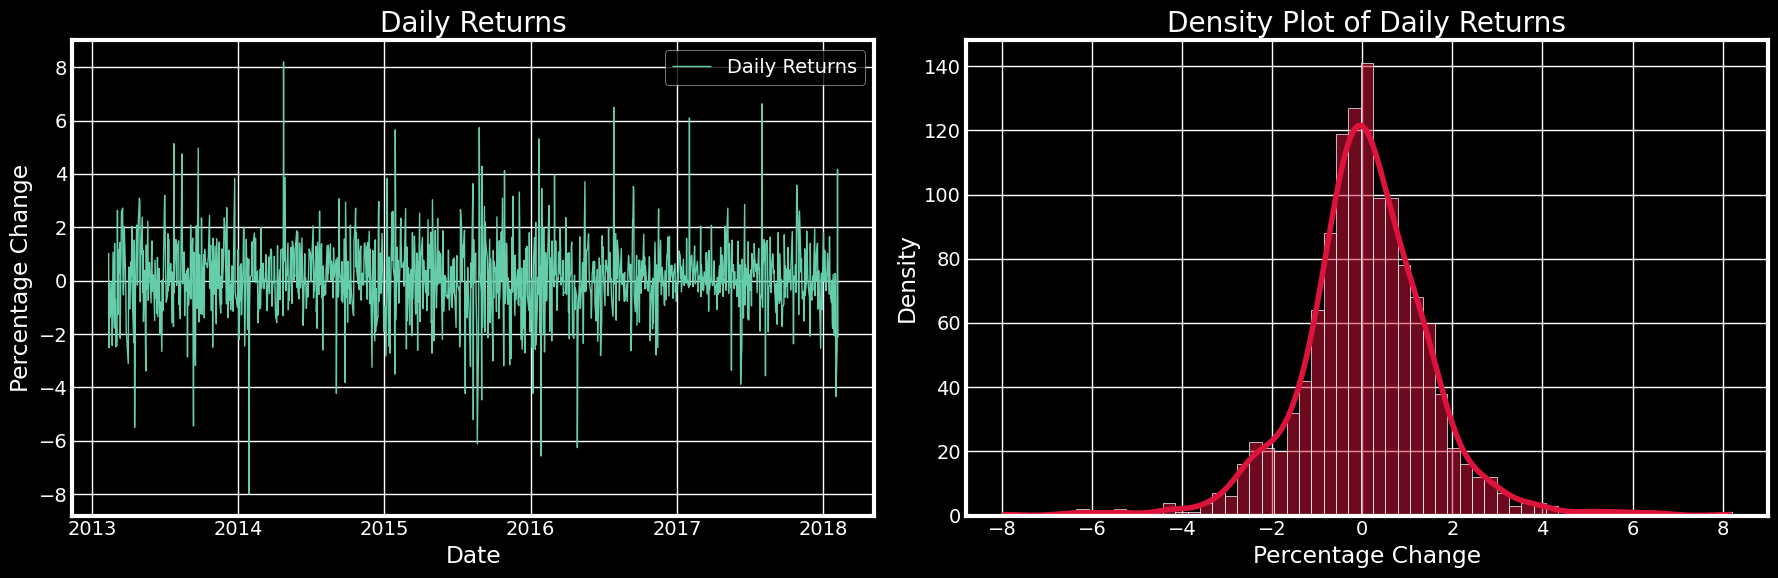

In [ ]:
# Plotting daily returns and density plot side by side
plt.figure(figsize=(18, 6))

# Plotting daily returns
plt.subplot(1, 2, 1)
plt.plot(new_df.index, new_df['DAILY RETURN'], color='mediumaquamarine', label='Daily Returns',linewidth=1)
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('Daily Returns')
plt.legend()
plt.grid(True)

# Plotting density plot
plt.subplot(1, 2, 2)
sns.histplot(new_df['DAILY RETURN'].dropna(), color='crimson', kde=True)
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.title('Density Plot of Daily Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

### <font face="Arial" size="4" color="#006064"><b> RISK ANALYSIS

---



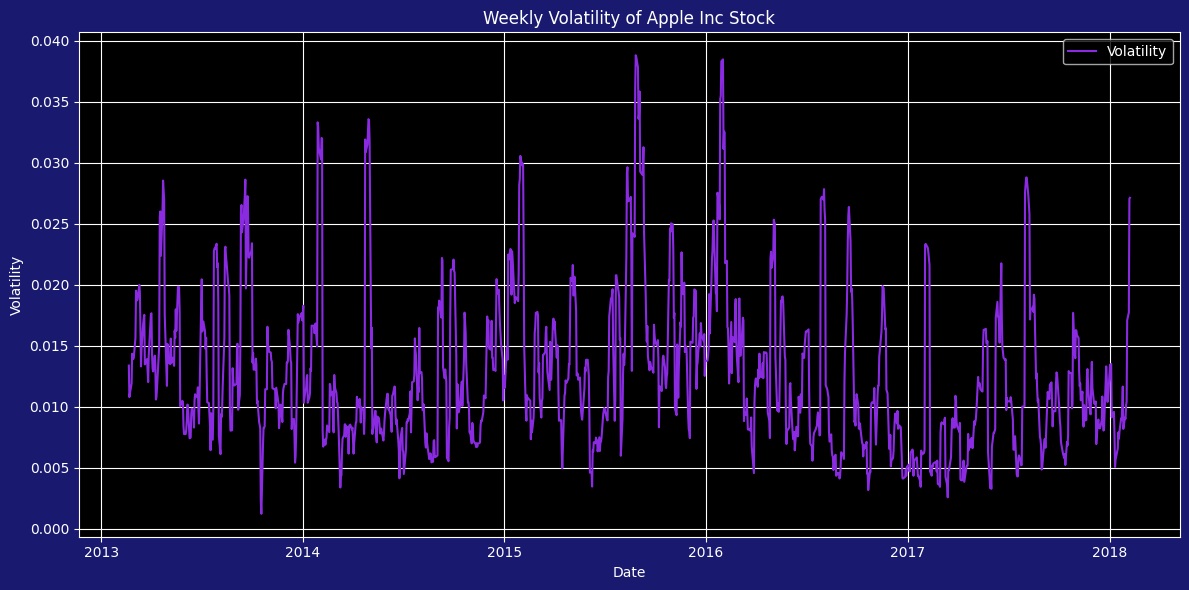

In [ ]:
new_df['Returns'] = new_df['CLOSE'].pct_change()

# Calculate rolling volatility (e.g., 30-day rolling standard deviation)
window_size = 7
new_df['Volatility'] = new_df['Returns'].rolling(window=window_size).std()

# Create the plot
plt.figure(figsize=(12, 6), facecolor='midnightblue')
plt.plot(new_df.index, new_df['Volatility'], label='Volatility', color='blueviolet')

# Customize the chart
plt.title('Weekly Volatility of Apple Inc Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()

# Show the chart
plt.tight_layout()
plt.show()

## <font face="Arial" size="5" color="#006064"><b> TIME SERIES COMPONENTS
 </b></font>

---

If we assume an additive decomposition, then we can write

$y_{t}$=$S_{t}$+$T_{t}$+$R_{t}$

where  yt
  is the data,  St
  is the seasonal component,  Tt
  is the trend-cycle component and  Rt
  is the residual component, all at period  t
 . Also,for a multiplicative decomposition, we have

yt=$S_{t}$.$T_{t}$.$R_{t}$

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. **Multiplicative decompositions are common with economic time series**.

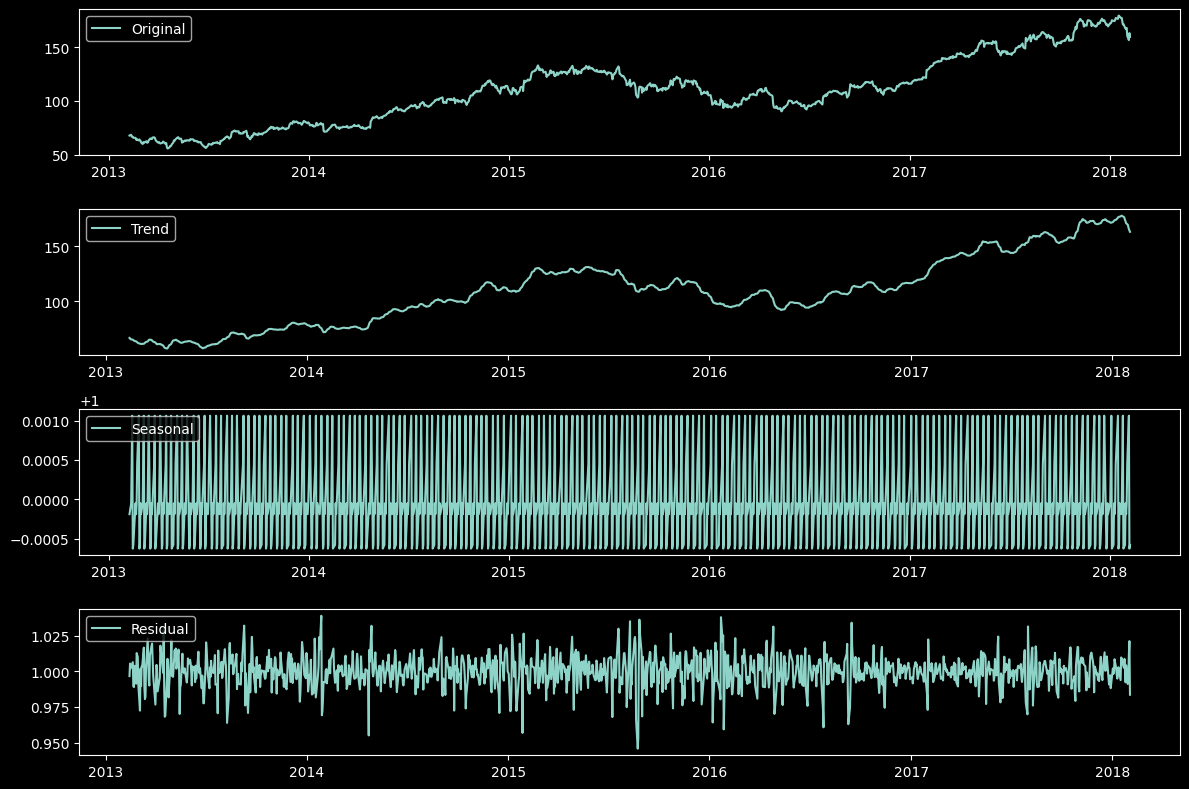

In [ ]:
result = seasonal_decompose(new_df['CLOSE'], model='multiplicative', period=7)
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(new_df.index, new_df['CLOSE'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(new_df.index, result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(new_df.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(new_df.index, result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The three components are shown separately in the bottom three panels. These components can be multiplied together to reconstruct the data shown in the top panel. We can see that the seasonal component changes slowly over time. But this doesn't mean years far apart won't have different seasonal patterns.

The residual component shown in the bottom panel is what is left over when the seasonal and trend-cycle components have been subtracted from the data.

If the seasonal component is removed from the original data, the resulting values are the “seasonally adjusted” data. For an additive decomposition, the seasonally adjusted data are given by  $y_{t}$−$S_{t}$
 , and for multiplicative data, the seasonally adjusted values are obtained using  $y_{t}$/$S_{t}$
 .

## <font face="Arial" size="5" color="#006064"><b> BUILDING TIME SERIES MODELSAND FORECASTING
 </b></font>

---



In analyzing Apple Inc.'s stock price, we rely on closing prices as the fundamental data source for several reasons. Closing prices, representing the last traded price of a stock at the end of the trading day, are widely regarded as a robust indicator of a stock's daily performance. They are easily accessible and offer a snapshot of the market's sentiment and consensus at the day's close. By leveraging closing prices, analysts can discern patterns, trends, and potential reversals, crucial for technical analysis and forecasting. Moreover, these prices are instrumental in developing trading strategies, backtesting historical performance, and making informed investment decisions. Their consistency and simplicity make them a cornerstone in comprehensively understanding Apple Inc.'s market behavior and guiding strategic investment choices.

## <font face="Arial" size="5" color="#006064"><b> TRAIN TEST SPLIT
 </b></font>

---

In [ ]:
# Create a new dataframe with only the 'Close column
Close = new_df.filter(['CLOSE'])

split_percentage = 0.90
split_index = int(len(Close) * split_percentage)

# Split the DataFrame into training and test sets
train_data = Close.iloc[:split_index]
test_data = Close.iloc[split_index:]

# Optionally, you can also create separate DataFrames for the timestamps if needed
train_timestamps = Close.index[:split_index]
test_timestamps = Close.index[split_index:]

# Print the number of observations in the training and test sets
print("Number of observations in the training set:", len(train_data))
print("Number of observations in the test set:", len(test_data))



Number of observations in the training set: 1133
Number of observations in the test set: 126


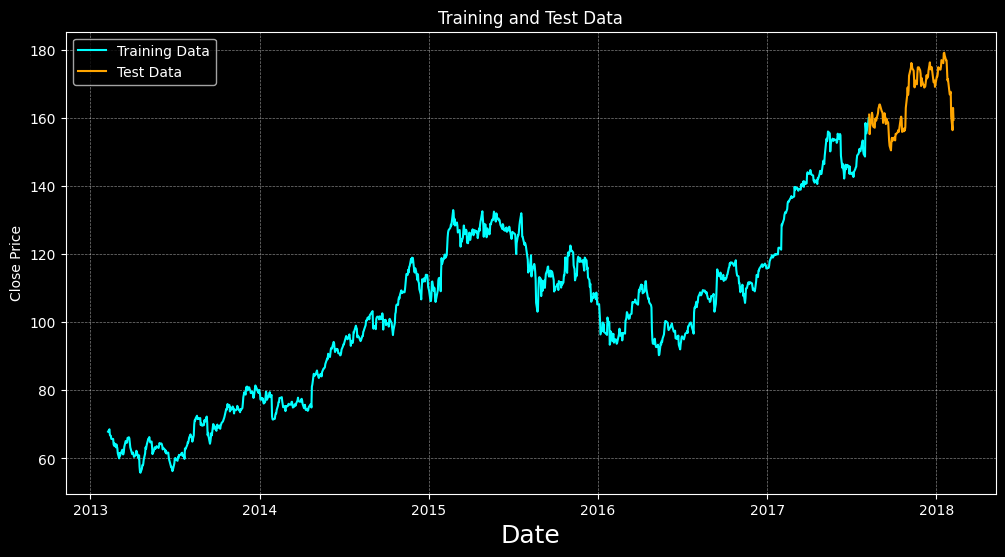

In [ ]:
plt.style.use('dark_background')

# Plot the training data with blue color and dotted gridlines
plt.figure(figsize=(12, 6))
plt.plot(train_timestamps, train_data, color='aqua', label='Training Data')
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)  # Adding dotted gridlines

# Plot the test data with orange color
plt.plot(test_timestamps, test_data, color='orange', label='Test Data')

# Set plot labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price')
plt.title('Training and Test Data')
plt.legend()
plt.show()


## <font face="Arial" size="5" color="#006064"><b> STATIONARITY
 </b></font>

---

In [ ]:
result = adfuller(train_data['CLOSE'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value <= 0.05:
    print('Reject the null hypothesis. The time series is stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is non-stationary.')

ADF Statistic: -0.2040130499637102
p-value: 0.9380415789926766
Fail to reject the null hypothesis. The time series is non-stationary.


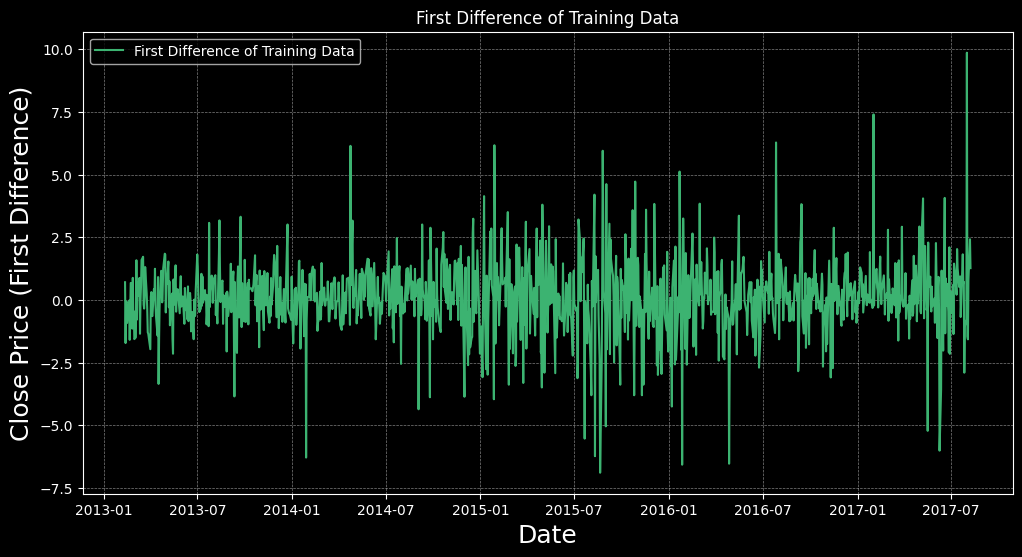

In [ ]:
# Calculate the first difference of train_data
train_data_diff = np.diff(train_data, axis=0)
plt.style.use('dark_background')
# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(train_timestamps[1:], train_data_diff, color='mediumseagreen', label='First Difference of Training Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (First Difference)', fontsize=18)
plt.title('First Difference of Training Data')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)  # Adding dotted gridlines
plt.show()


In [ ]:
result = adfuller(train_data_diff)

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value <= 0.05:
    print('Reject the null hypothesis. The time series is stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is non-stationary.')

ADF Statistic: -33.24615375603875
p-value: 0.0
Reject the null hypothesis. The time series is stationary.


Upon performing first order differencing the time series becomes **stationary.**

## <font face="Arial" size="5" color="#006064"><b> AUTOCORRELATIONS AND PARTIAL AUTOCORRELATION
 </b></font>

---



<Figure size 1000x400 with 0 Axes>

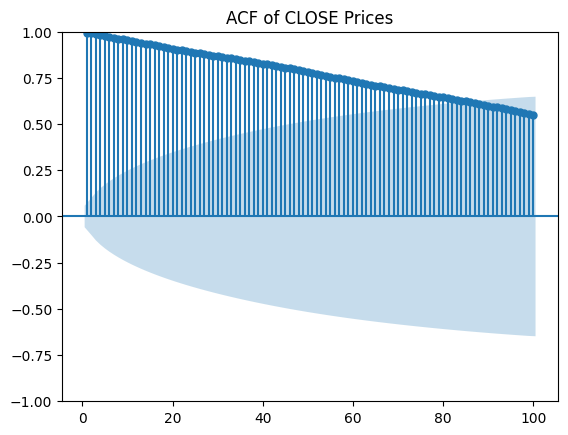

<Figure size 1000x400 with 0 Axes>

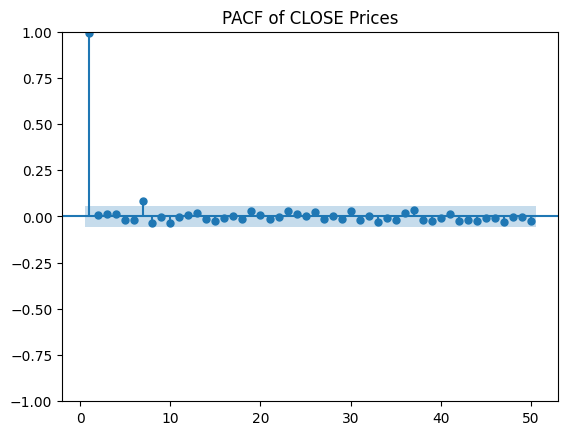

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 4))
plot_acf(train_data['CLOSE'], lags=100, zero=False)
plt.title('ACF of CLOSE Prices')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 4))
plot_pacf(train_data['CLOSE'], lags=50, zero=False)
plt.title('PACF of CLOSE Prices')
plt.show()

## <font face="Arial" size="5" color="#006064"><b> MODELLING AND FORECASTING
 </b></font>

---

### <font face="Arial" size="5" color="#006064"><b> AUTO-ARIMA MODEL
 </b></font>

---

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [ ]:
train_close_series = train_data['CLOSE']
test_close_series = test_data['CLOSE']

model = auto_arima(train_close_series, test='adf',
                          start_p=1, start_q=1,
                          max_p=3, max_q=3,
                          d=None, seasonal=True,
                          start_P=0, m=3,
                          trace=True, error_action='ignore',
                          suppress_warnings=True, stepwise=True,
                          D=1, information_criterion='aic')



# Summary of the selected ARIMA model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=5385.289, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=4501.734, Time=0.55 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=4874.900, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=5392.808, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=4748.427, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=4377.770, Time=0.93 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=14.02 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=5388.515, Time=0.50 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=4369.692, Time=1.08 sec
 ARIMA(2,0,0)(1,1,0)[3] intercept   : AIC=4487.695, Time=0.54 sec
 ARIMA(2,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=7.94 sec
 ARIMA(2,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(2,0,1)(2,1,0)[3] intercept   : AIC=4367.022, Time=

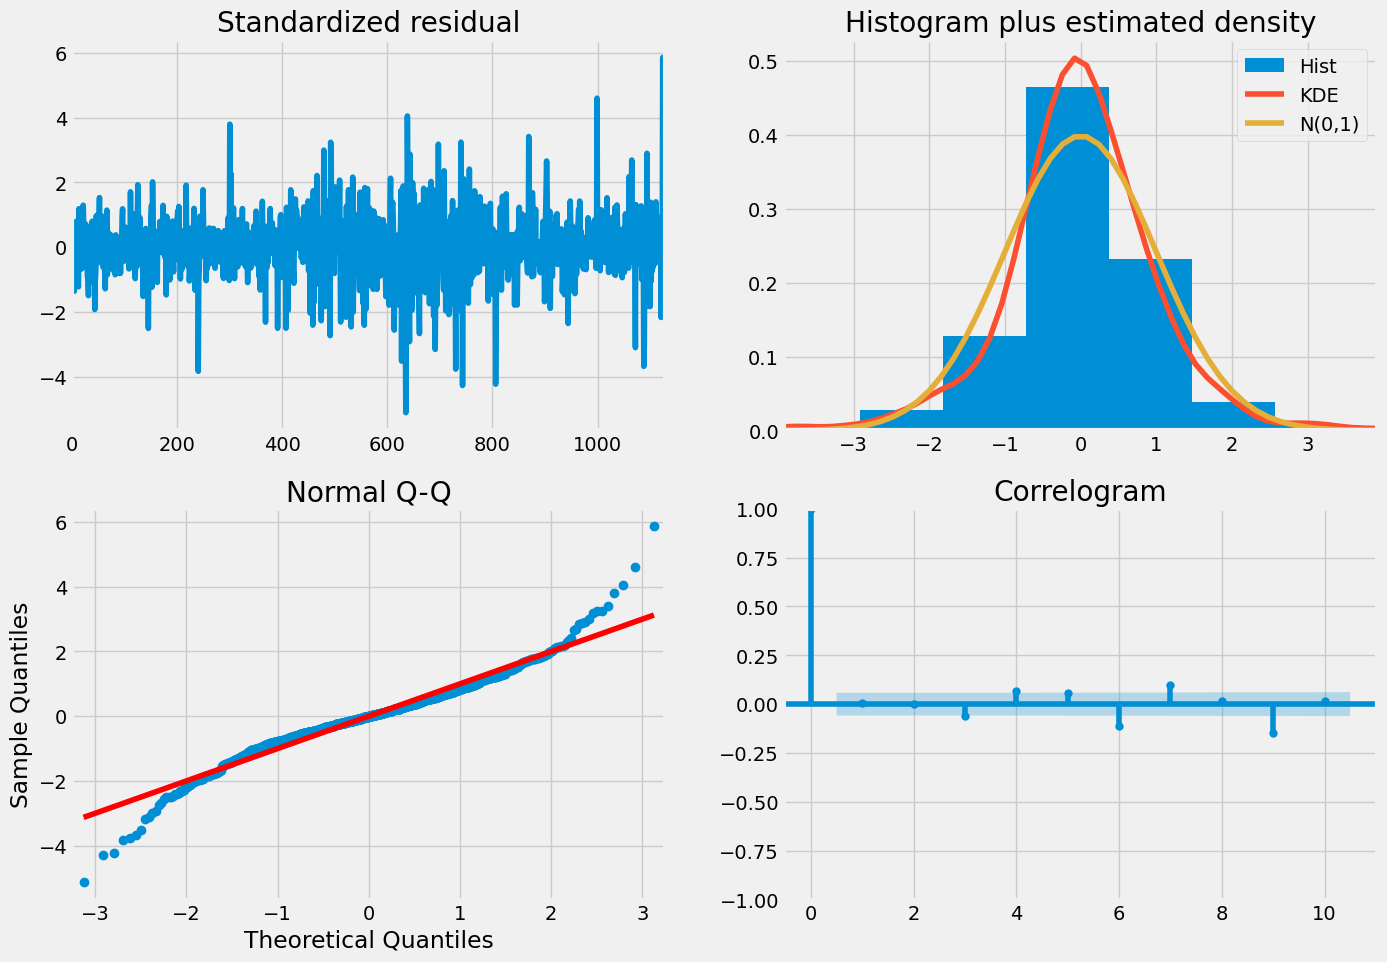

In [ ]:
plt.style.use('fivethirtyeight')
model.plot_diagnostics(figsize=(15, 10))
plt.subplots_adjust(top = 0.93)
plt.show()

Model diagnostics interpretation:

**1) Standardized residual:** It is an error term of price forecating and actual price of stocks

**2) Histogram plus estimated density:** Histogram reresents normal distribution of errors, KDE plots and N(0,1) is notation of indicate mean is ZERO and variance of the distribution is ONE.

**3) Normal Q-Q:** Normal Q-Q plot implies normality of distribution as sample quantities mostly inline with theoretical quanitites. any deviation in such alignment would indicate distribution is skewed, or in layman terms error is either positive or negative side.

**4) Correlogram:** It simply indicates partial auto-correlation of time-series and shows which laged time-series is significant in forecasting actual time-series.

So Auto Arima model provided the model as **ARIMA(2,0,1)(2,1,0)[3]**

### <font face="Arial" size="5" color="#006064"><b> PREDICTIONS ON TEST DATA
 </b></font>

---

In [ ]:
def make_predictions_and_print_rmse(model, test_df):
    print(f"forecasting and RMSE of Apple Inc")

    forecast, confidence_interval = model.predict(X=test_data, n_periods = len(test_data), return_conf_int = True)
    forecasts = pd.Series(forecast, index = test_data[:len(test_data)].index)
    lower = pd.Series(confidence_interval[:, 0], index = test_data[:len(test_data)].index)
    upper = pd.Series(confidence_interval[:, 1], index = test_data[:len(test_data)].index)

    rmse = np.sqrt(np.mean((forecast.values - test_data.values) ** 2))

    print("RMSE is: ", rmse)

    return forecasts, lower, upper
forecast, lower, upper = make_predictions_and_print_rmse(model, test_data)

forecasting and RMSE of Apple Inc
RMSE is:  8.442202982102868


## <font face="Arial" size="5" color="#006064"><b> FORECASTING USING PROPHET
 </b></font>

---

Prophet is an open-source tool from Facebook used for forecasting time series data which helps businesses understand and possibly predict the market. It is based on a decomposable additive model where non-linear trends fit with seasonality, it also takes into account the effects of holidays.

Prophet uses **Piece-Wise Linear Model**.The piece-wise linear model is fit using the following statistical equations,  


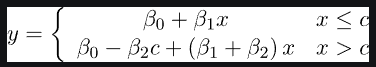

In [ ]:
new_df.reset_index(inplace=True)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9ug7egi/wiw9utne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9ug7egi/zi7xb2p2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64179', 'data', 'file=/tmp/tmpe9ug7egi/wiw9utne.json', 'init=/tmp/tmpe9ug7egi/zi7xb2p2.json', 'output', 'file=/tmp/tmpe9ug7egi/prophet_model1k0vomz_/prophet_model-20231013213741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:37:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[[<matplotlib.lines.Line2D at 0x7b674f0806a0>],

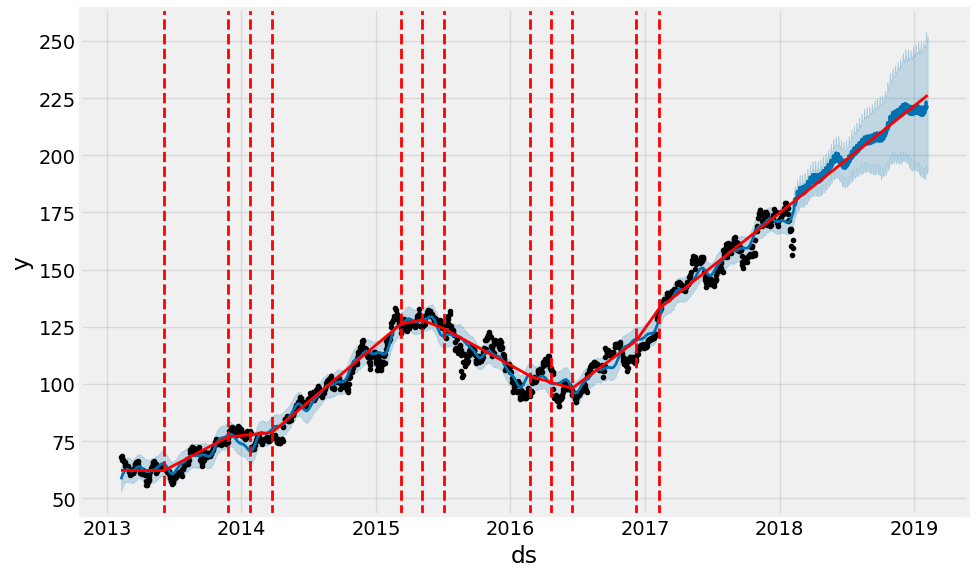

In [ ]:
# Rename columns for Prophet
new_df.rename(columns={'DATE': 'ds', 'CLOSE': 'y'}, inplace=True)

# Create and fit the model
model = Prophet()
model.fit(new_df)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # You can adjust the number of periods as needed
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)

# Add changepoints to the plot
add_changepoints_to_plot(fig.gca(), model, forecast)


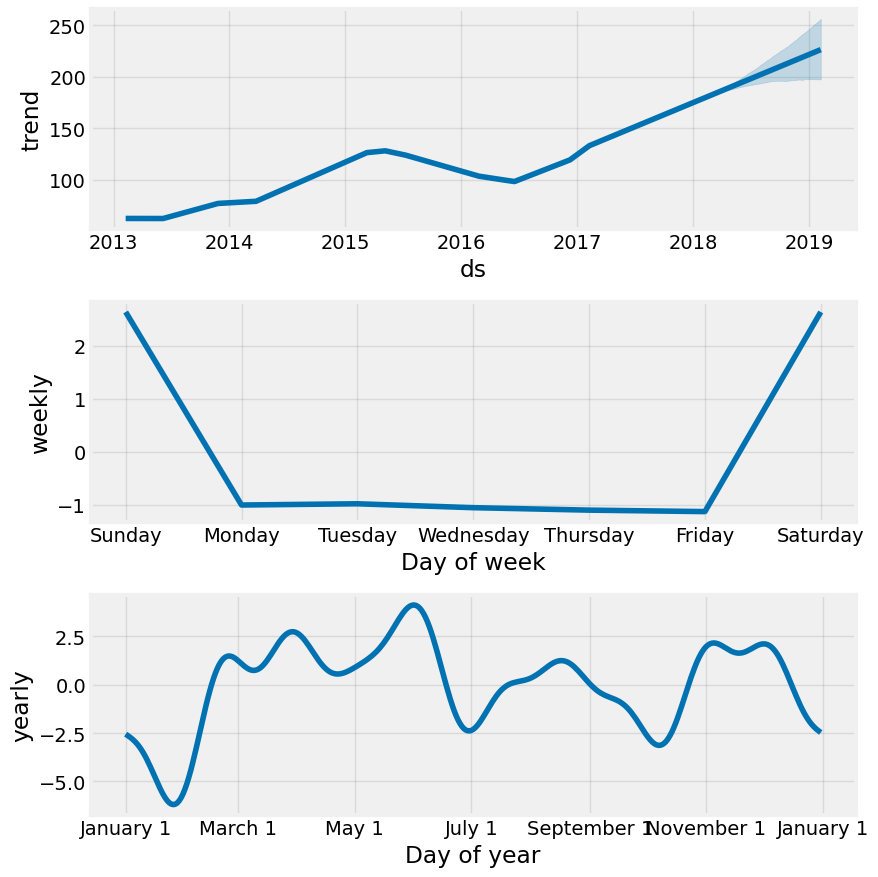

In [ ]:
# Plot the components of the forecast
fig = model.plot_components(forecast)


## <font face="Arial" size="5" color="#006064"><b> FORECASTING USING LSTM
 </b></font>

---